In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from IPython.core.display import display, HTML

2024-05-30 19:57:42.673286: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 19:57:42.673439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 19:57:42.834686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Exploring data

In [2]:
df = pd.read_csv("/kaggle/input/mental-health-detection-dataset/Deepression.csv")

In [3]:
annotation = {1: "Never", 2: "Always",
              3: "Often", 4: "Rarely",
              5: "Sometimes", 6: "Not at all"}

reverse_annotation = dict()

for i, j in annotation.items():
    reverse_annotation[j] = i
print(reverse_annotation)

{'Never': 1, 'Always': 2, 'Often': 3, 'Rarely': 4, 'Sometimes': 5, 'Not at all': 6}


In [4]:
df.shape

(813, 16)

In [5]:
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


# Dropping patients ids because not relevant for training and EDA


In [6]:
df.drop("Number ", axis=1, inplace=True)


# Observing NULL values

In [7]:
df.isna().sum()

Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

# Exploring Nature of NULL values

In [8]:
print(df[df.isna().all(axis=1)])

     Sleep  Appetite  Interest  Fatigue  Worthlessness  Concentration  \
540    NaN       NaN       NaN      NaN            NaN            NaN   
541    NaN       NaN       NaN      NaN            NaN            NaN   
542    NaN       NaN       NaN      NaN            NaN            NaN   
543    NaN       NaN       NaN      NaN            NaN            NaN   
544    NaN       NaN       NaN      NaN            NaN            NaN   
..     ...       ...       ...      ...            ...            ...   
808    NaN       NaN       NaN      NaN            NaN            NaN   
809    NaN       NaN       NaN      NaN            NaN            NaN   
810    NaN       NaN       NaN      NaN            NaN            NaN   
811    NaN       NaN       NaN      NaN            NaN            NaN   
812    NaN       NaN       NaN      NaN            NaN            NaN   

     Agitation  Suicidal Ideation  Sleep Disturbance  Aggression  \
540        NaN                NaN                NaN   

# Dropping all NULL values rows because all NULL values are just empty rows

In [9]:
df.dropna(inplace=True)
df.isna().sum()

Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64

# New data dimensionality

In [10]:
print(df[df.isna().all(axis=1)])
df.shape

Empty DataFrame
Columns: [Sleep, Appetite, Interest, Fatigue, Worthlessness, Concentration, Agitation, Suicidal Ideation, Sleep Disturbance, Aggression, Panic Attacks, Hopelessness, Restlessness, Low Energy, Depression State]
Index: []


(540, 15)

In [11]:
for i in df.columns[:-1]:
    df[i] = df[i].astype(int)
print(df.dtypes)


Sleep                 int64
Appetite              int64
Interest              int64
Fatigue               int64
Worthlessness         int64
Concentration         int64
Agitation             int64
Suicidal Ideation     int64
Sleep Disturbance     int64
Aggression            int64
Panic Attacks         int64
Hopelessness          int64
Restlessness          int64
Low Energy            int64
Depression State     object
dtype: object


# Annotating labels to their real values for EDA insights 
**Here Annotation is the dictionary defined above**

***Annotation = {1: "Never", 2: "Always",
              3: "Often", 4: "Rarely",
              5: "Sometimes", 6: "Not at all"}***
            
 ***Reverse Annotation: {'Never': 1, 'Always': 2, 'Often': 3, 'Rarely': 4, 'Sometimes': 5, 'Not at all': 6}***
 

In [12]:
for i in df.columns[:-1]:
    df[i] = df[i].map(annotation)
df

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,Never,Never,Never,Sometimes,Sometimes,Never,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Mild
1,Always,Sometimes,Sometimes,Never,Never,Sometimes,Never,Never,Sometimes,Never,Never,Never,Never,Never,Moderate
2,Sometimes,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,Severe
3,Never,Never,Never,Sometimes,Sometimes,Never,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,No depression
4,Always,Sometimes,Sometimes,Never,Never,Sometimes,Never,Never,Sometimes,Never,Never,Never,Never,Never,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Always,Sometimes,Sometimes,Never,Never,Sometimes,Never,Never,Sometimes,Never,Never,Never,Never,Sometimes,Mild
536,Sometimes,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,Always,Never,Severe
537,Never,Never,Never,Sometimes,Sometimes,Never,Sometimes,Sometimes,Never,Sometimes,Sometimes,Sometimes,Sometimes,Always,No depression
538,Always,Sometimes,Sometimes,Never,Never,Sometimes,Never,Never,Sometimes,Never,Never,Never,Never,Never,Severe


# Number of symptom tendencies and diagnoses among patients

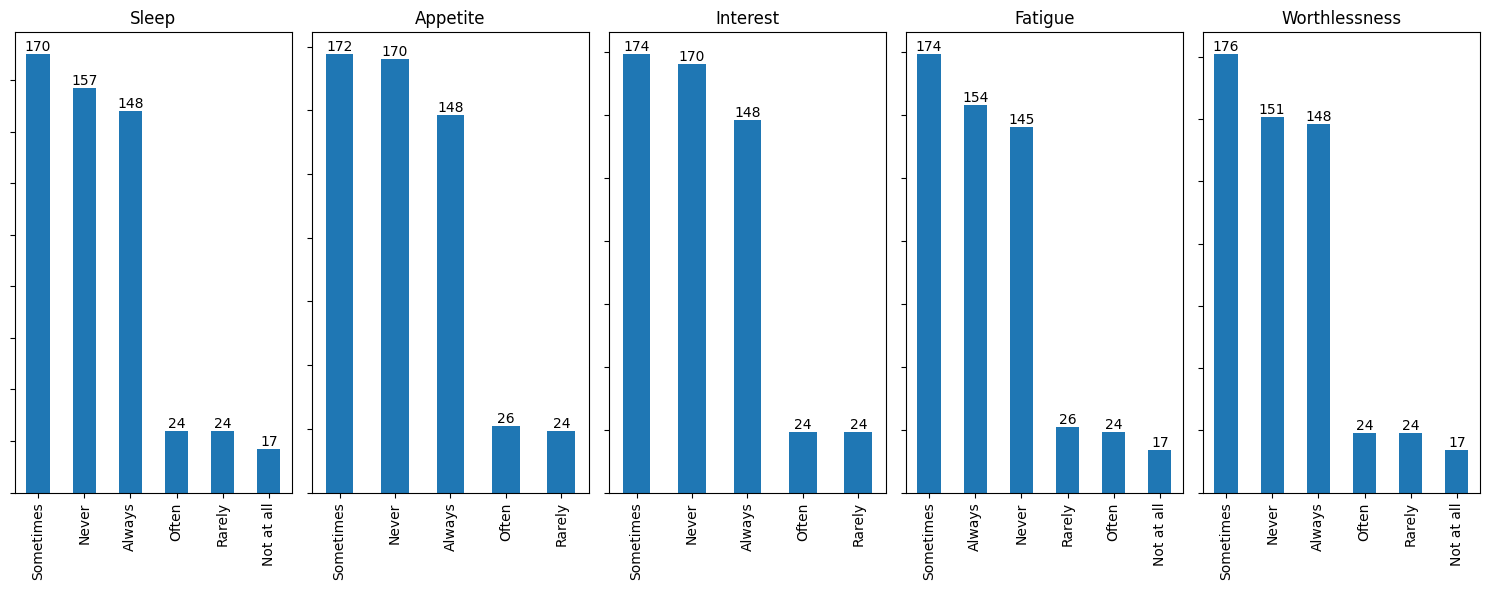

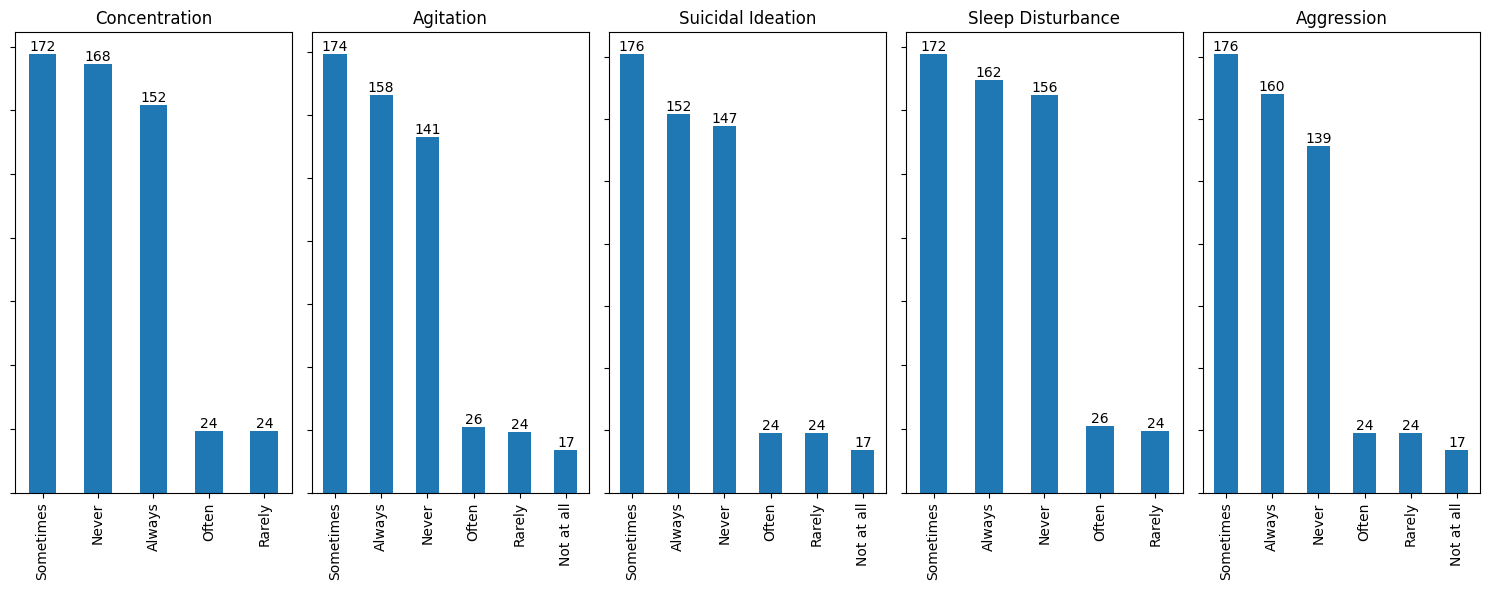

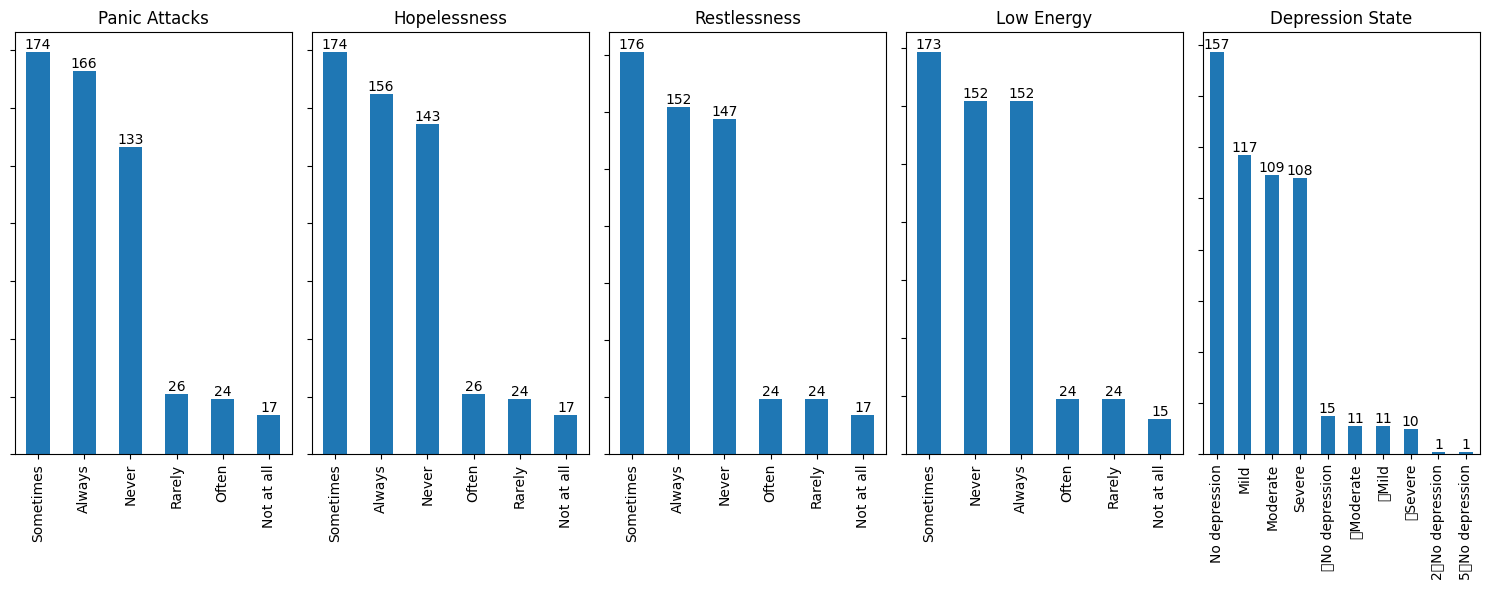

In [13]:
index = 0
for i in range(3):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 6))
    for j in range(5):
        count = df[df.columns[index]].value_counts()
        count.plot(kind="bar", ax=axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        axes[j].set_title(df.columns[index])
        index += 1
    plt.tight_layout()
    plt.show()

# Changing variations of diagnoses to their basic version

In [14]:
def mapping(x):
    if "No depression" in x:
        return "No depression"
    if "Mild" in x:
        return "Mild"
    if "Severe" in x:
        return "Severe"
    if "Moderate" in x:
        return "Moderate"

df["Depression State"] = df["Depression State"].apply(mapping)

# New depression states counts

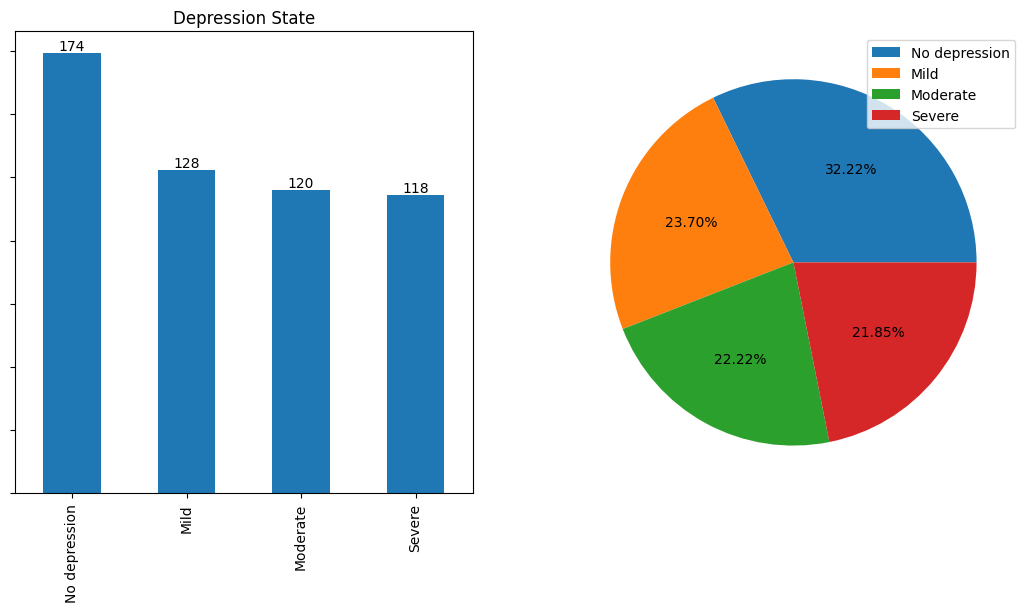

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))
counts = df[df.columns[-1]].value_counts()
counts.plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title(df.columns[-1])

axes[1].pie(counts, autopct="%0.2f%%")
axes[1].legend(counts.index)
axes[1].set_yticklabels(())
axes[1].set_xticklabels(())
axes[1].set_ylabel("")
axes[1].set_xlabel("")


plt.show()

# Creating and visualising crosstabs that show how different symptoms affect depression state

In [16]:
crosstabs = dict()

for i in df.columns[:-1]:
    crosstabs[i] = pd.crosstab(df[i], df[df.columns[-1]])

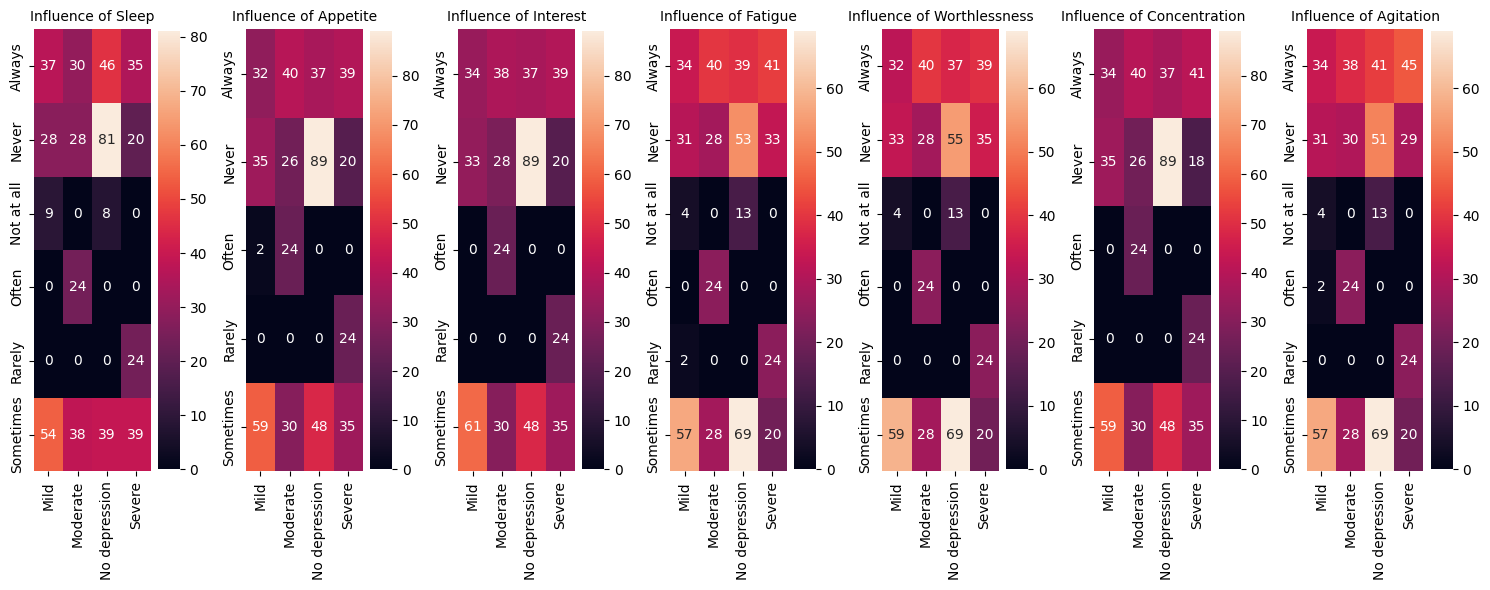

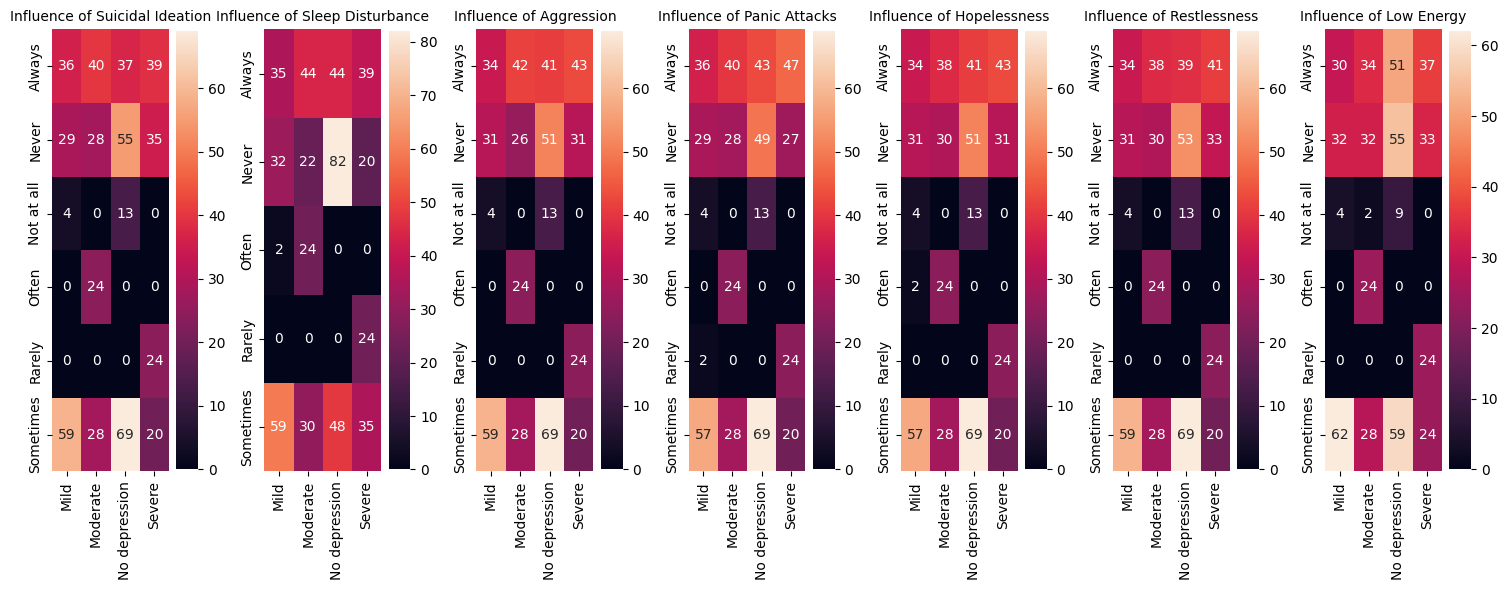

In [17]:
index = 0

for i in range(2):
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))
    for j in range(7):
        sns.heatmap(crosstabs[df.columns[index]], annot=True, fmt='d', ax=axes[j])
        axes[j].set_title("Influence of {}".format(df.columns[index]), size=10)
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        index += 1
    plt.tight_layout()
    plt.show()

# Set of symptoms per each stage of depression recorded

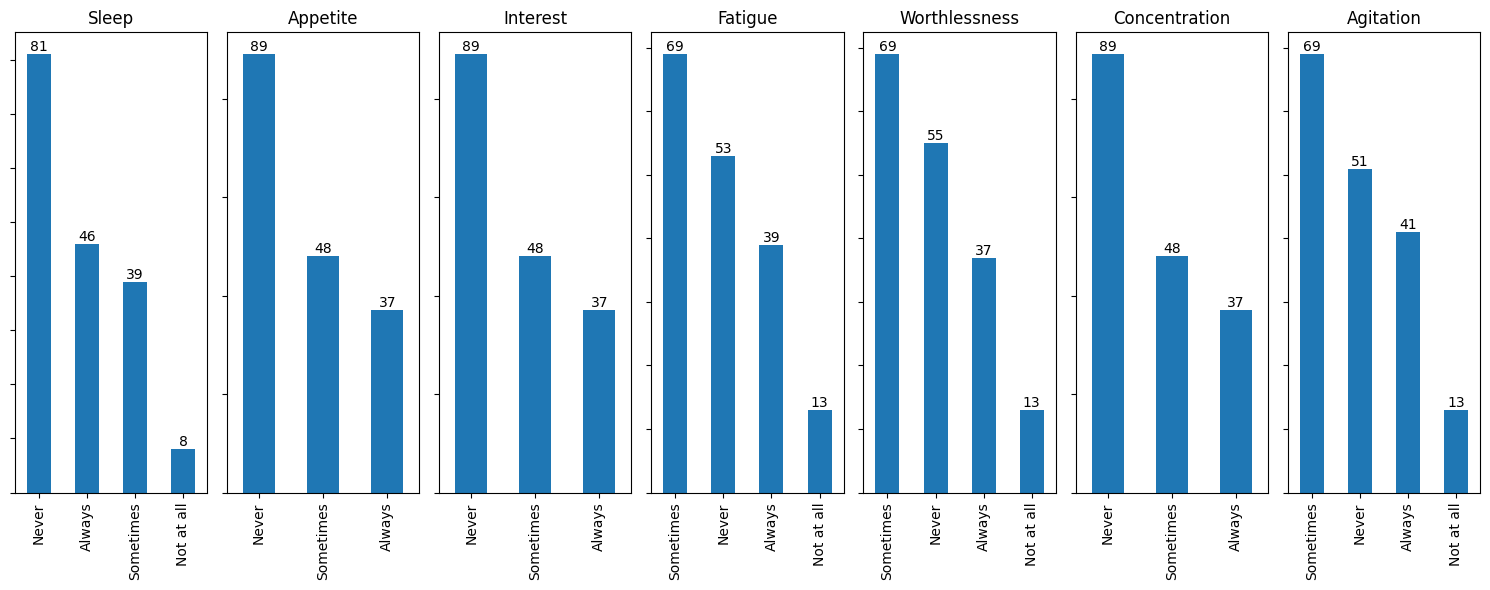

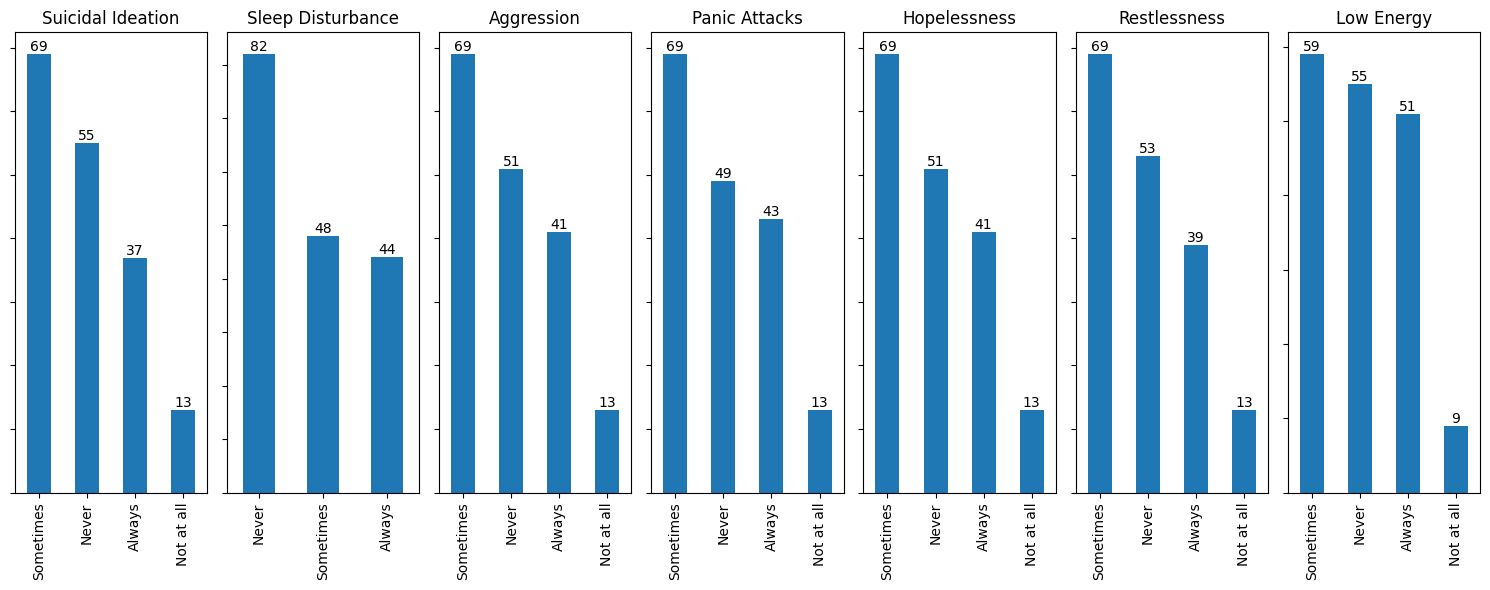

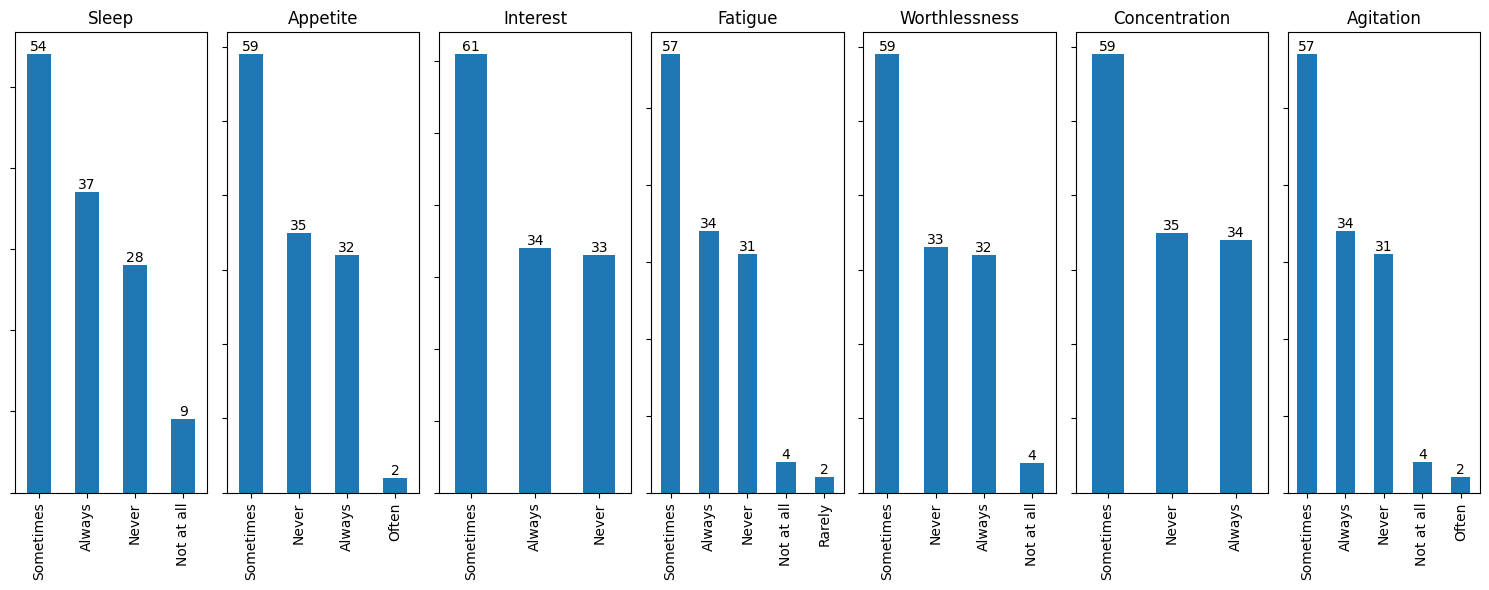

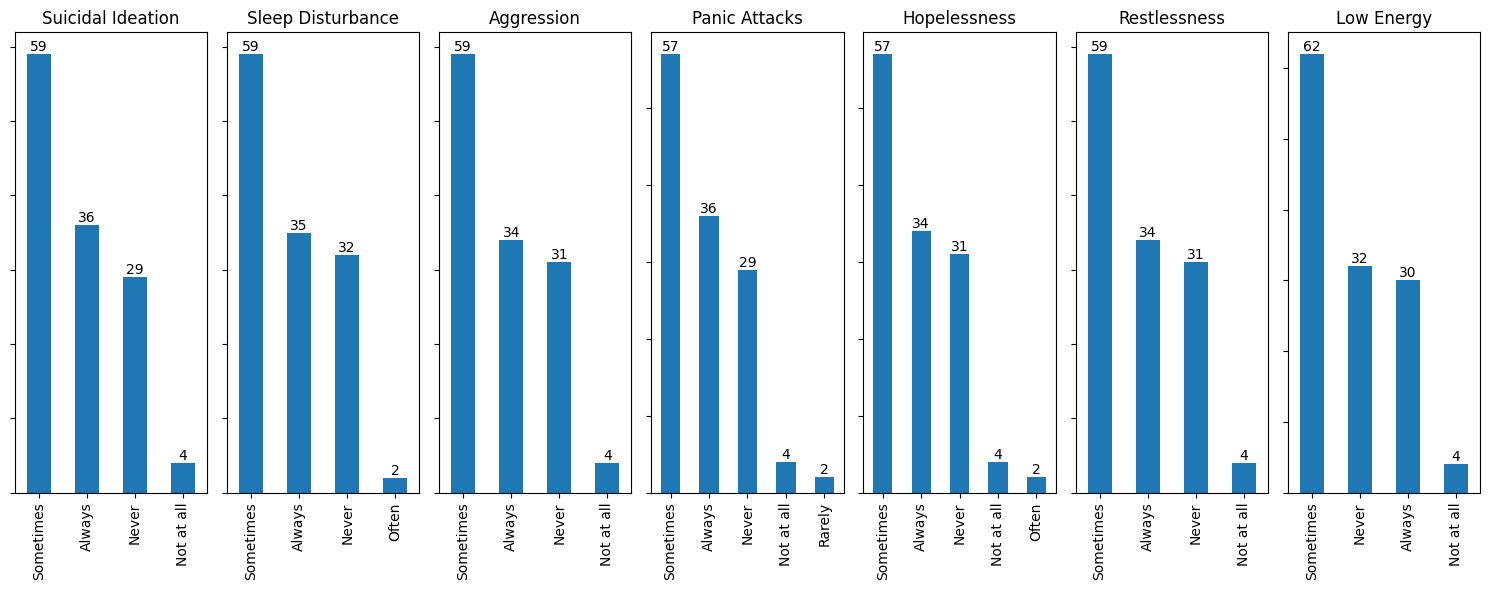

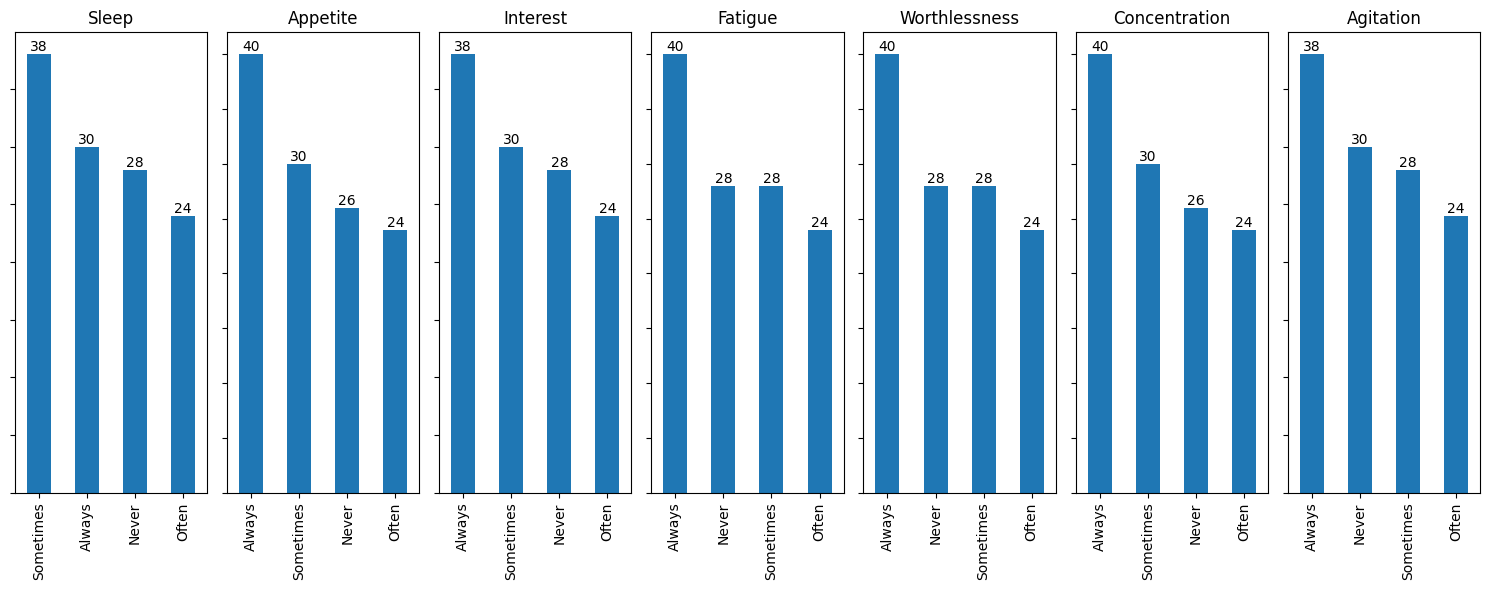

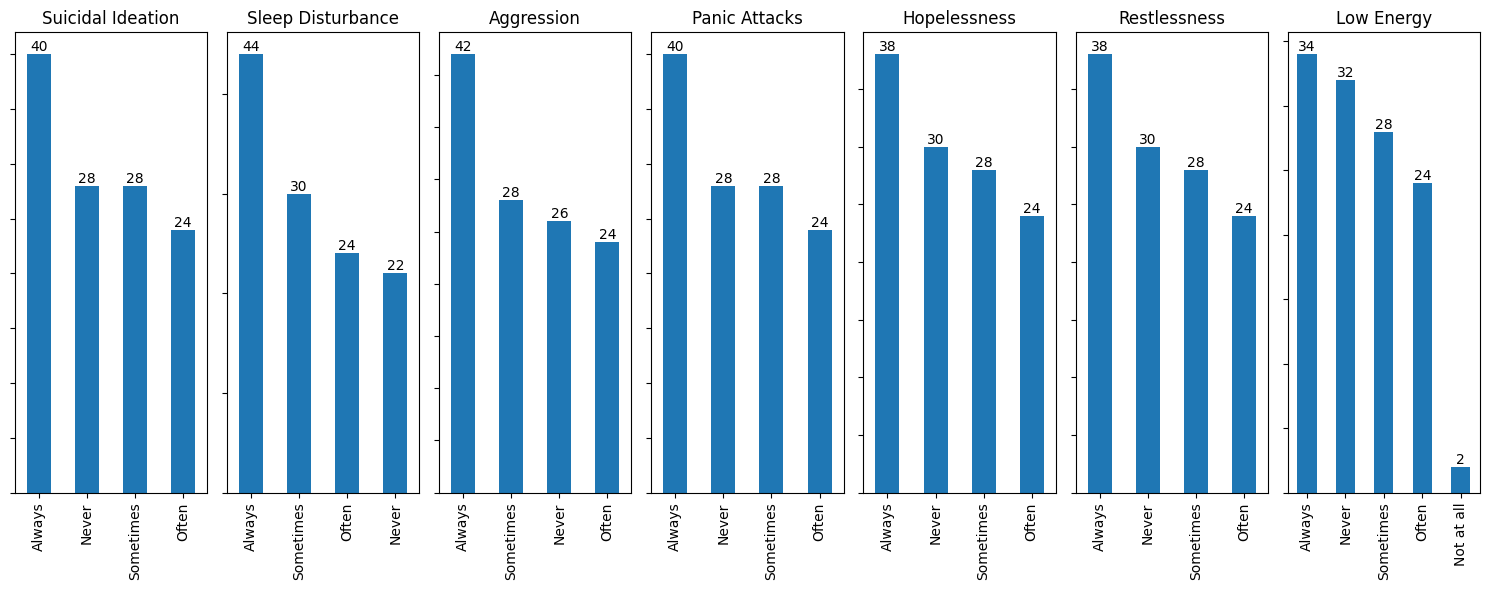

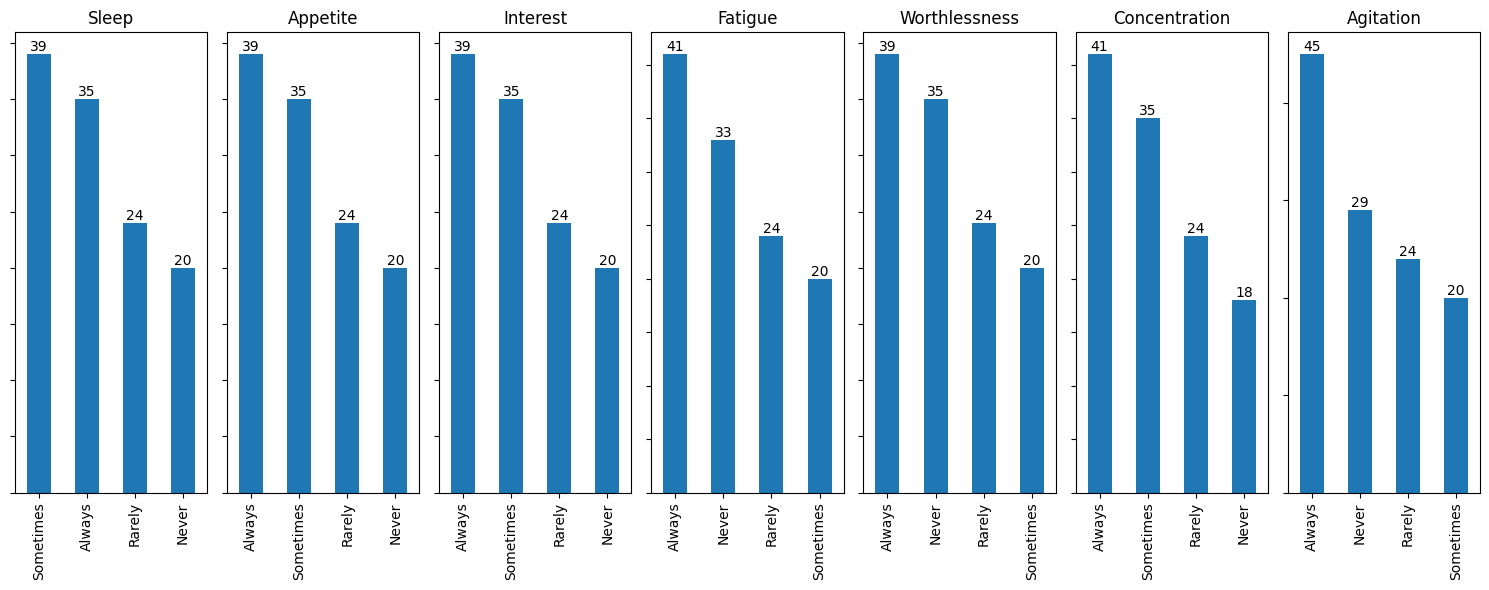

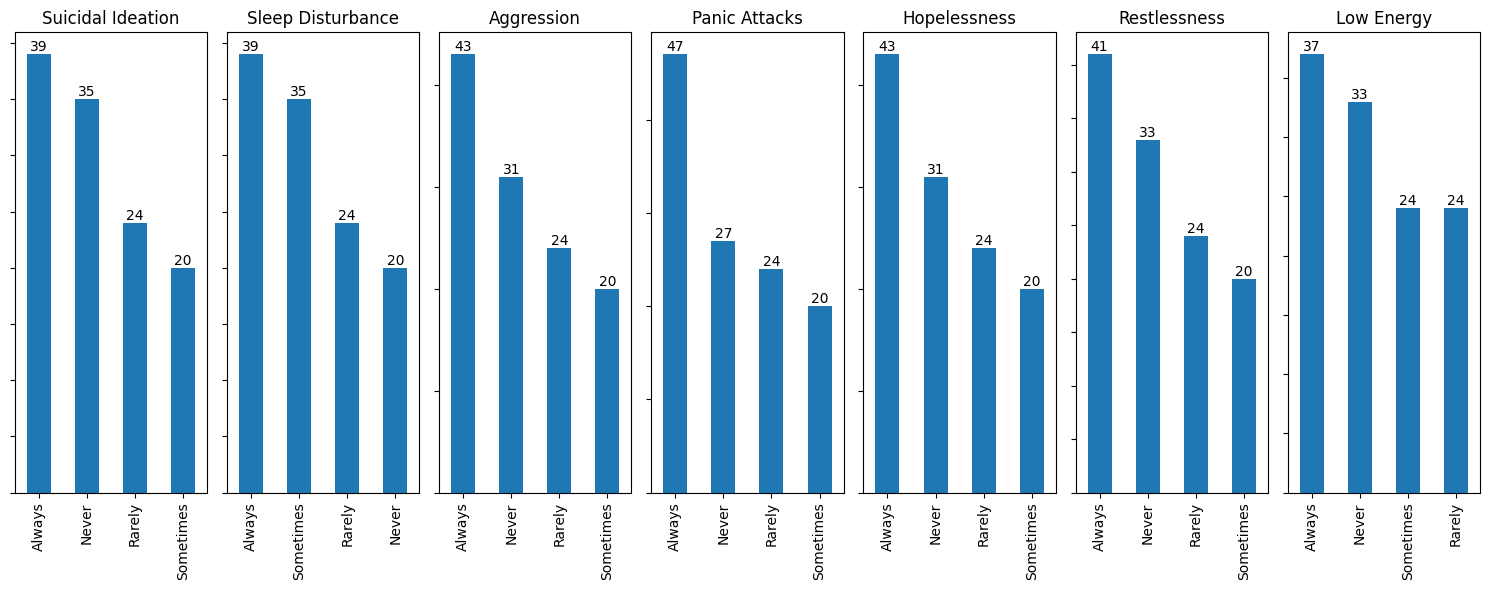

In [18]:
for i in ["No depression", "Mild", "Moderate", "Severe"]:
    display(HTML("<h2>{}</h2>".format(i)))
    temp_df = df[df["Depression State"] == i]
    cols = df.columns[:-1]
    index = 0
    for j in range(2):
        fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))
        for k in range(7):
            count = temp_df[cols[index]].value_counts()
            count.plot(kind="bar", ax=axes[k])
            for container in axes[k].containers:
                axes[k].bar_label(container)
            axes[k].set_yticklabels(())
            axes[k].set_ylabel("")
            axes[k].set_xlabel("")
            axes[k].set_title(cols[index])
            index += 1
        plt.tight_layout()
        plt.show()

# Reversing annotation
**{'Never': 1, 'Always': 2, 'Often': 3, 'Rarely': 4, 'Sometimes': 5, 'Not at all': 6}**


In [19]:
for i in df.columns[:-1]:
    df[i] = df[i].map(reverse_annotation)
df

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1,1,5,5,1,5,5,1,5,5,5,5,5,Mild
1,2,5,5,1,1,5,1,1,5,1,1,1,1,1,Moderate
2,5,2,2,2,2,2,2,2,2,2,2,2,2,2,Severe
3,1,1,1,5,5,1,5,5,1,5,5,5,5,5,No depression
4,2,5,5,1,1,5,1,1,5,1,1,1,1,1,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2,5,5,1,1,5,1,1,5,1,1,1,1,5,Mild
536,5,2,2,2,2,2,2,2,2,2,2,2,2,1,Severe
537,1,1,1,5,5,1,5,5,1,5,5,5,5,2,No depression
538,2,5,5,1,1,5,1,1,5,1,1,1,1,1,Severe


# Encoding depression states

In [20]:


encode = {"No depression": 0, "Mild": 1, "Moderate": 2, "Severe": 3}

decode = ["No depression", "Mild", "Moderate", "Severe"]

df[df.columns[-1]] = df[df.columns[-1]].map(encode)

df

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1,1,5,5,1,5,5,1,5,5,5,5,5,1
1,2,5,5,1,1,5,1,1,5,1,1,1,1,1,2
2,5,2,2,2,2,2,2,2,2,2,2,2,2,2,3
3,1,1,1,5,5,1,5,5,1,5,5,5,5,5,0
4,2,5,5,1,1,5,1,1,5,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,2,5,5,1,1,5,1,1,5,1,1,1,1,5,1
536,5,2,2,2,2,2,2,2,2,2,2,2,2,1,3
537,1,1,1,5,5,1,5,5,1,5,5,5,5,2,0
538,2,5,5,1,1,5,1,1,5,1,1,1,1,1,3


# Scaling values in the dataset

In [21]:
scaler = MinMaxScaler()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x = scaler.fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [23]:
def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(pred, y_test)
    report = classification_report(pred, y_test)
    cm = confusion_matrix(pred, y_test)
    proba = model.predict_proba(x_test)
    return score*100, report, cm, pred, proba

# Classic ML models

In [24]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()
lgr = LogisticRegression()
mnb = MultinomialNB()


models = [rfc, abc, gbc,
         etc, xgb, lgb,
         lgr, mnb]

names = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
        "XGB", "LGBM", "Logistic Regression", "Naive Bayes"]

# ANN model architecture for classification

In [25]:
in_vals = tf.keras.Input(shape=(x.shape[1],))
layer = tf.keras.layers.Dense(32, activation="relu")(in_vals)
dropout = tf.keras.layers.Dropout(0.2)(layer)
layer1 = tf.keras.layers.Dense(len(encode), activation="softmax")(dropout)
model = tf.keras.Model(inputs=in_vals, outputs=layer1)
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss="categorical_crossentropy",
             metrics=["accuracy"])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612 (2.39 KB)

 Trainable params: 612 (2.39 KB)

 Non-trainable params: 0 (0.00 B)

# Training classic ML models and saving their performance

In [26]:
scores, reports, cms, preds, probas = [], dict(), dict(), dict(), dict()

for i, j in zip(models, names):
    score, report, cm, pred, proba = training(i)
    scores += [score]
    reports[j] = report
    cms[j] = cm
    preds[j] = pred
    probas[j] = proba

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 80
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.514549
[LightGBM] [Info] Start training from score -1.473306
[LightGBM] [Info] Start training from score -1.525131
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [27]:
y_cat = tf.keras.utils.to_categorical(y_train)

# Training ANN model

In [28]:
history = model.fit(x_train, y_cat, batch_size=8, validation_split=0.1, epochs=20)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2733 - loss: 1.4359 - val_accuracy: 0.3864 - val_loss: 1.3602
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2857 - loss: 1.3909 - val_accuracy: 0.4318 - val_loss: 1.3452
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2858 - loss: 1.3678 - val_accuracy: 0.4091 - val_loss: 1.3358
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3653 - loss: 1.3327 - val_accuracy: 0.4545 - val_loss: 1.3229
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3581 - loss: 1.3554 - val_accuracy: 0.4091 - val_loss: 1.3175
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3749 - loss: 1.3280 - val_accuracy: 0.4091 - val_loss: 1.3112
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3475 - loss: 1.3565 - val_accuracy: 0.4091 - val_loss: 1.3077
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3806 - loss: 1.3431 - val_accuracy: 0.4091 - val_loss:

# Training performance log

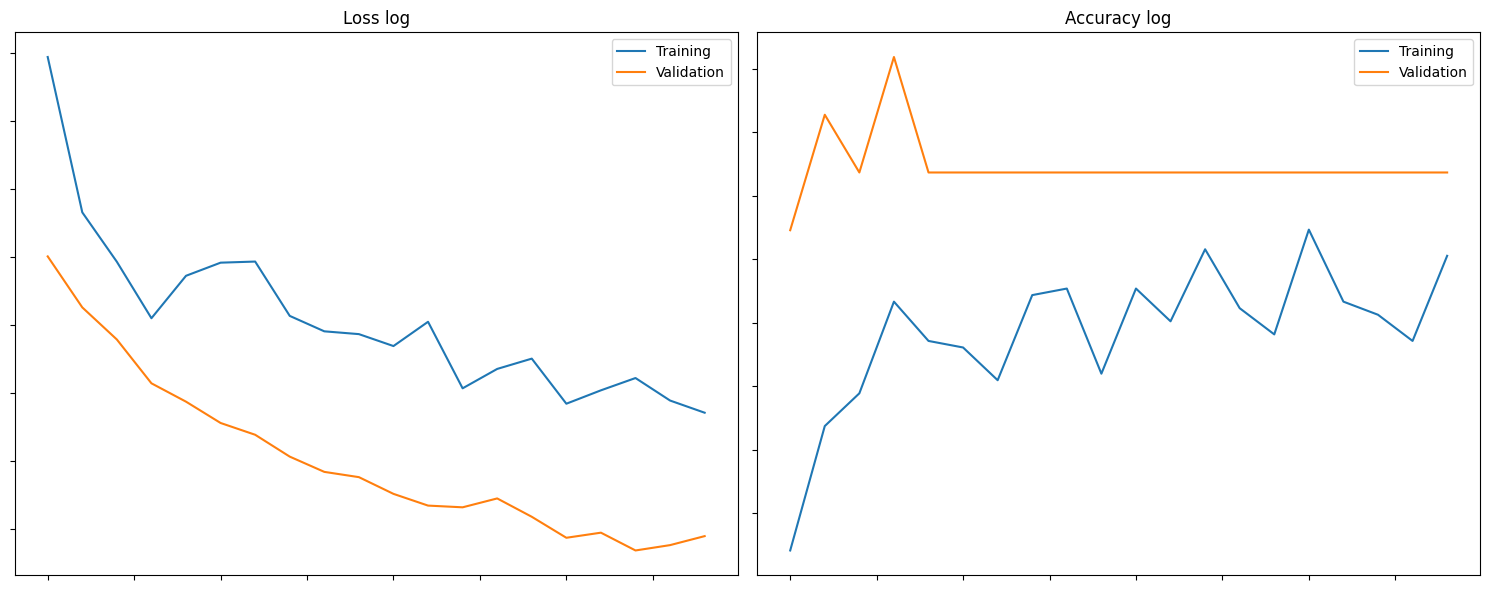

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

index = 0

axes[index].plot(history.history["loss"], label="Training")
axes[index].plot(history.history["val_loss"], label="Validation")
axes[index].legend()
axes[index].set_title("Loss log")
axes[index].set_xticklabels(())
axes[index].set_yticklabels(())
axes[index].set_ylabel("")
axes[index].set_xlabel("")

index += 1

axes[index].plot(history.history["accuracy"], label="Training")
axes[index].plot(history.history["val_accuracy"], label="Validation")
axes[index].legend()
axes[index].set_title("Accuracy log")
axes[index].set_xticklabels(())
axes[index].set_yticklabels(())
axes[index].set_ylabel("")
axes[index].set_xlabel("")

plt.tight_layout()
plt.show()

# Predicting diagnoses using ANN and recording test performances

In [30]:
pred = model.predict(x_test)
labels = [np.argmax(i) for i in pred]
score = accuracy_score(labels, y_test)
report = classification_report(labels, y_test)
cm = confusion_matrix(labels, y_test)

scores += [score*100]
reports["ANN"] = report
cms["ANN"] = cm
preds["ANN"] = labels
probas["ANN"] = pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


# Model accuracies rated from best to worst

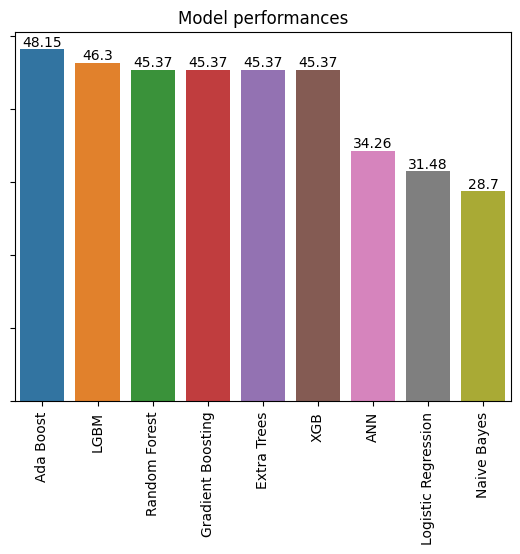

In [31]:
dd = pd.DataFrame({"scores": scores}, index=names+["ANN"])
dd = dd.sort_values("scores", ascending=False)
dd["scores"] = round(dd["scores"], 2)
fig, axes = plt.subplots()

sns.barplot(x=dd.index, y=dd.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)

axes.set_title("Model performances")
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_yticklabels(())
axes.set_ylabel("")
axes.set_xlabel("")
plt.show()

# Average probabilities for each diagnosis predicted by each model

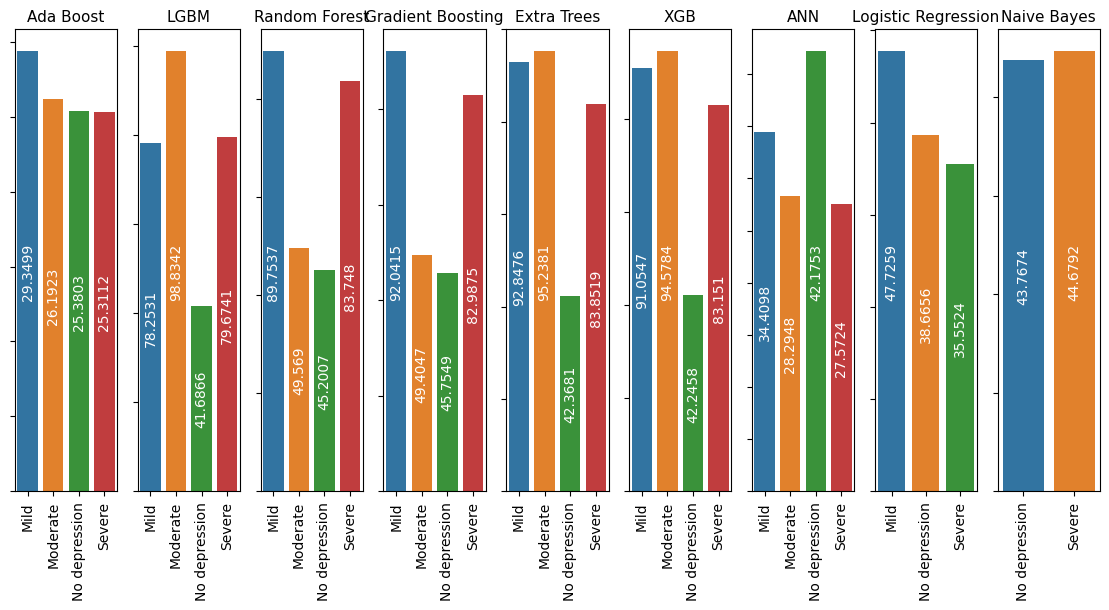

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(14, 6))
index = 0
for i in dd.index:
    predicted_label = []
    confidence_score = []
    for j, k in zip(preds[i], probas[i]):
        predicted_label += [decode[j]]
        confidence_score += [k[j]*100]
    dt = pd.DataFrame({"labels": predicted_label, "score": confidence_score})
    grouped = dt.groupby("labels")
    mean = grouped["score"].mean()
    sns.barplot(x=mean.index, y=mean, ax=axes[index])
    for container in axes[index].containers:
        axes[index].bar_label(container, rotation=90, label_type="center", color="white")
    axes[index].set_title(i, size=11)
    axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=90)
    axes[index].set_yticklabels(())
    axes[index].set_ylabel("")
    axes[index].set_xlabel("")
    index += 1

# Confusion matrices

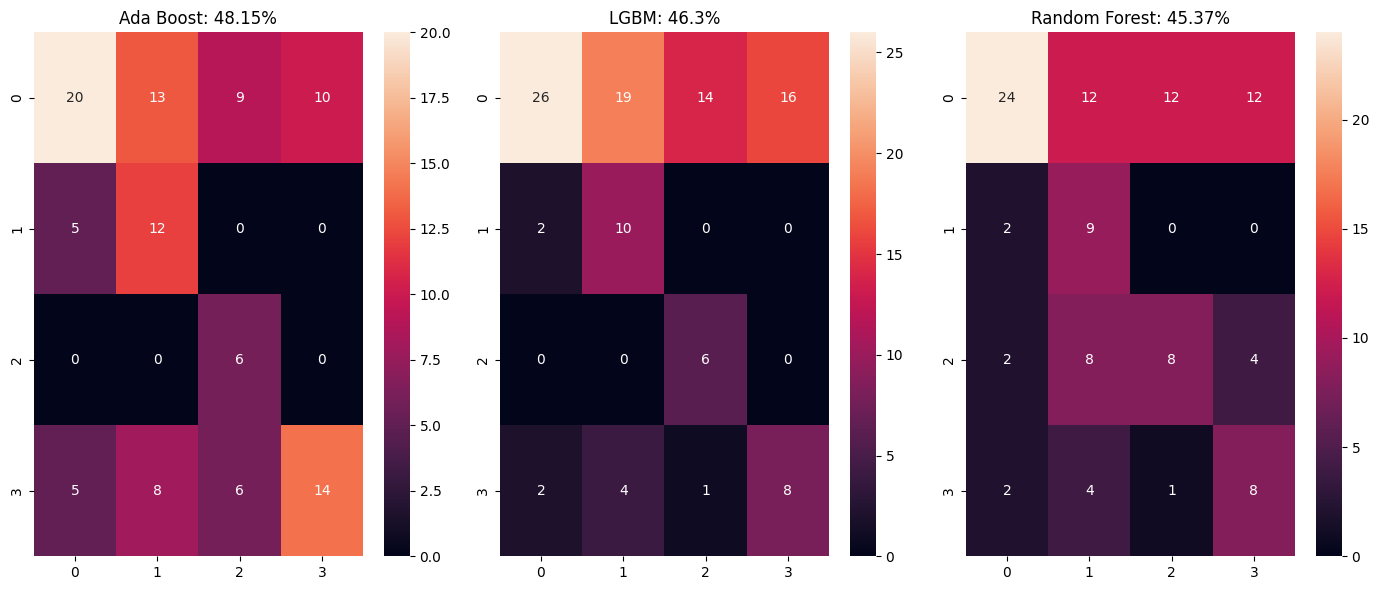

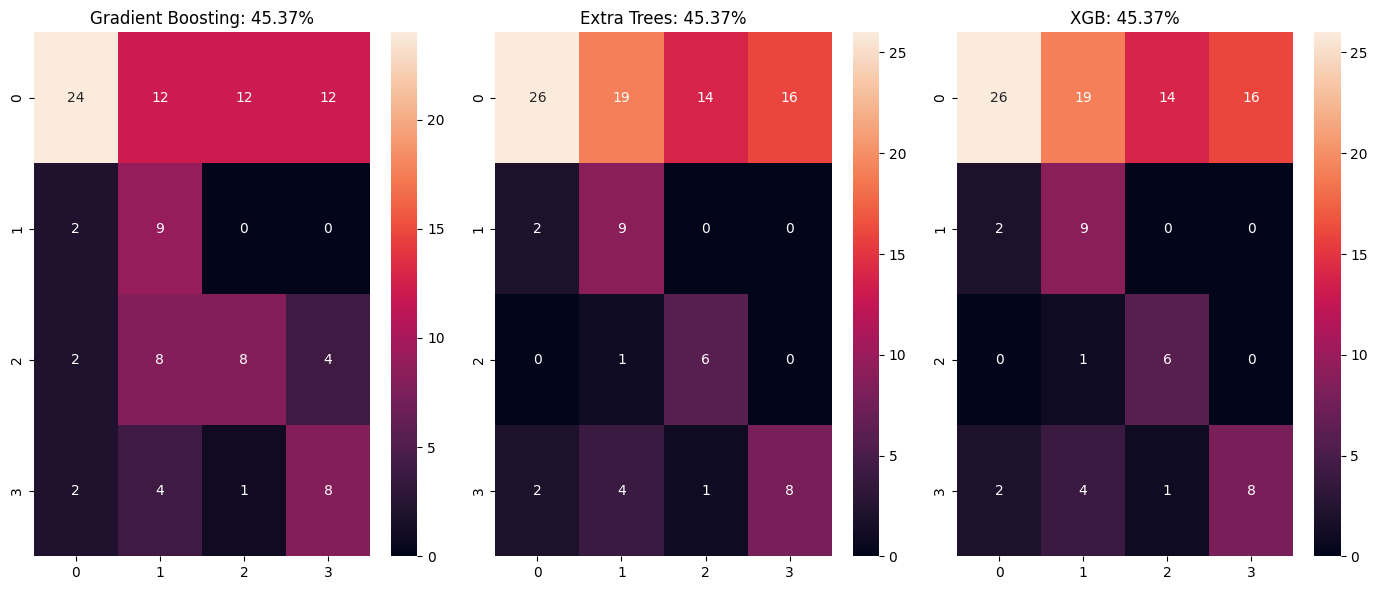

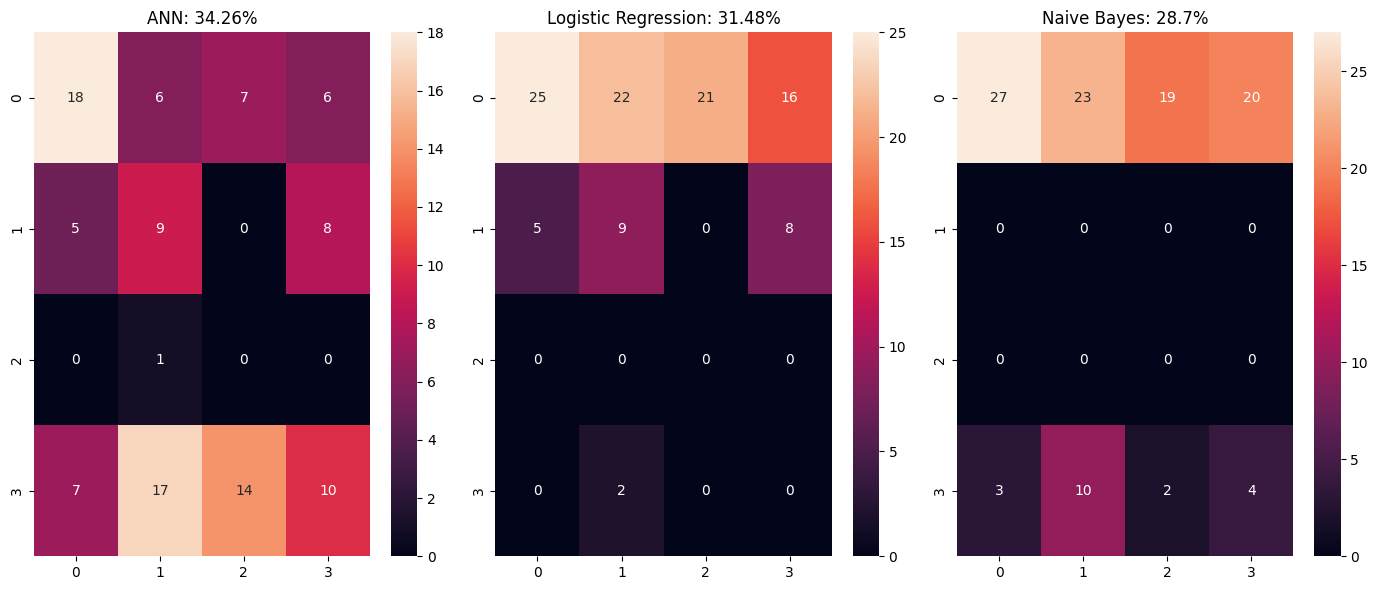

In [33]:
index = 0
for i in range(3):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
    
    for j in range(3):
        sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[j])
        axes[j].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
        index += 1
    plt.tight_layout()
    plt.show()

# Classification reports breakdown

In [34]:
for i in dd.index:
    print("*"*40)
    print(i)
    print(reports[i])
    print("\n")

****************************************
Ada Boost
              precision    recall  f1-score   support

           0       0.67      0.38      0.49        52
           1       0.36      0.71      0.48        17
           2       0.29      1.00      0.44         6
           3       0.58      0.42      0.49        33

    accuracy                           0.48       108
   macro avg       0.47      0.63      0.48       108
weighted avg       0.57      0.48      0.49       108



****************************************
LGBM
              precision    recall  f1-score   support

           0       0.87      0.35      0.50        75
           1       0.30      0.83      0.44        12
           2       0.29      1.00      0.44         6
           3       0.33      0.53      0.41        15

    accuracy                           0.46       108
   macro avg       0.45      0.68      0.45       108
weighted avg       0.70      0.46      0.47       108



*****************************